- pip install jupyter
- pip install numpy
- pip install matplotlib
- pip install scikit-learn



In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

![my picture](https://www.fatalerrors.org/images/blog/c6b544ae87e97d71cb450e434a8818a6.jpg)
- apple_width ≈ 6cm
- apple_length ≈ 6cm
- banana_width ≈ 4cm
- banana_length ≈ 8cm

- apple = 0
- banana = 1

In [17]:
def generate_dataset(n):
    apple_width = np.random.normal(6 ,1 ,n)
    apple_length = np.random.normal(6 ,1 ,n)
    banana_width = np.random.normal(4 ,1 ,n)
    banana_length = np.random.normal(8 ,1 ,n)
    
    width = np.concatenate((apple_width , banana_width))
    length = np.concatenate((apple_length , banana_length))
    x = np.array((width , length)).T
    
    y_apples = np.zeros(n , dtype='int')
    y_bananas = np.ones(n , dtype='int')
    y = np.concatenate((y_apples , y_bananas))
    
    return x , y

In [18]:
X_train , Y_train = generate_dataset(100)

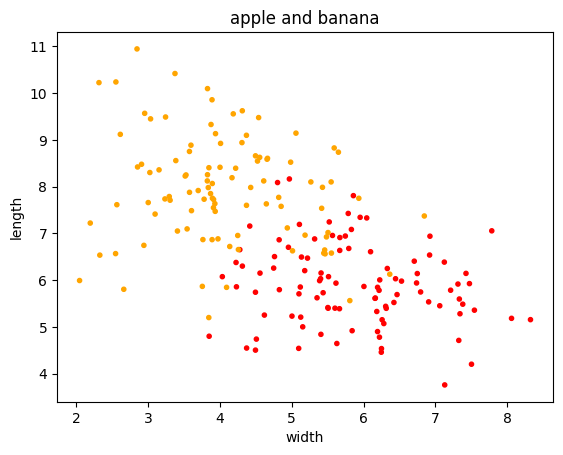

In [19]:
cmap = ["red" , "orange"]
plt.scatter(X_train[:,0] ,X_train[:,1] , c = Y_train ,cmap=ListedColormap(cmap) ,marker='.')

plt.title("apple and banana")
plt.xlabel('width')
plt.ylabel('length')
plt.show()

In [20]:
from knn import KNN

In [21]:
knn = KNN(k = 5)
knn.fit(X_train,Y_train)

In [22]:
new_fruit = np.array([3, 8.4])
new_fruit_2 = np.array([6, 6])
new_fruit_3 = np.array([4, 7])
new_fruits = (new_fruit,new_fruit_2,new_fruit_3)
outputs = knn.predict(new_fruits)

In [23]:
for output in outputs:
    if  output == 0:
        print("apple🍎")
    else:
        print("banana🍌")

banana🍌
apple🍎
banana🍌


In [24]:
X_test , Y_test = generate_dataset(90)

In [25]:
knn.evaluate(X_test , Y_test)


0.9111111111111111

In [26]:
Y_pred = knn.predict(X_test)

In [27]:
confusion_matrix = np.zeros((2,2))

for i in range(180):
    if Y_test[i] == 0 and Y_pred[i] == 0:
        confusion_matrix[0][0] += 1
    elif Y_test[i] == 0 and Y_pred[i] == 1:
        confusion_matrix[0][1] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 0:
        confusion_matrix[1][0] += 1
    elif Y_test[i] == 1 and Y_pred[i] == 1:
        confusion_matrix[1][1] += 1
        
        
confusion_matrix
        

array([[79., 11.],
       [ 5., 85.]])

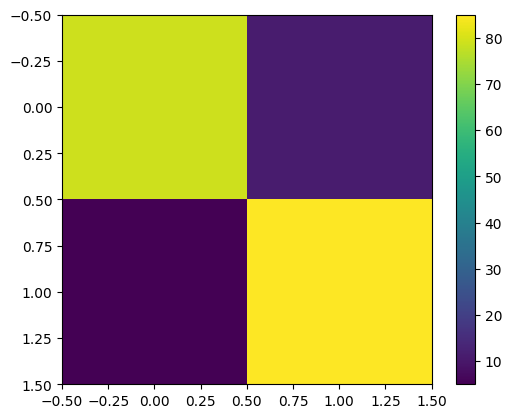

In [28]:
plt.imshow(confusion_matrix)
plt.colorbar()
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
knn.predict(new_fruits)

array([1, 0, 1])

In [30]:
knn.score(X_test,Y_test)

0.9111111111111111